In [51]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from sklearn.linear_model import LinearRegression as sklearn_LR
%matplotlib inline

ImportError: cannot import name 'linear_regression' from 'linear_regression' (C:\Users\User\anaconda3\lib\site-packages\linear_regression\__init__.py)

1.У вас, с прошлого урока, имеются реализации расчёта среднеквадратичной ошибки и её градиента для линейнй регрессии с коэффициентами при факторах(w) и свободным коэффициентам.
В этом задании вы должны модифицировать реализацию рассчёта среднеквадратичной ошибки и рассчёта её производной, так, чтобы с к среднеквадратичной ошибке добавлялась l2 регулярязационная поправка: $ +c*\sum \limits _{j}  w_{j}^2 $ а к градиенту- ссответствующее выражение для градиента регулярязационной поправки.

In [6]:
class linear_regression:
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0+self.c*np.sum(self.w**2)
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0]+2*self.c*self.w, np.sum(2*delta)/y_real.shape[0]

2.На основе этих функций создайте свою регуляризированную полиномиальную регрессию и опробуйте на одном из примеров построения полиномиальной модели из этого урока.
Пояснение:Для этого Вам достаточно создать класс, который наследуется от класса polynomial_regression из данного урока, и переопределить в нём методы mserror, mserror_grad(под переопределением подразумевается создание на новом классе методов с таким же названием).

In [7]:
import pandas as pd

In [44]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [45]:
from scipy.optimize import minimize
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def _optimize(self, X, Y):
            def assign_w(w):
                self.w0=w[0]
                self.w=w[1:][np.newaxis, :]
            def func(w):
                assign_w(w)
                return super(polynomial_regression, self).test(X, Y)
            def jac(w):
                assign_w(w)
                gr_w, gr_w0=self._mserror_grad(X,Y)
                return np.concatenate([[gr_w0], gr_w.flatten()])
            w=np.zeros((X.shape[1]+1,))
            w=minimize(func, w, jac=jac, method= 'BFGS').x
            assign_w(w)
       
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [46]:
class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power)).flatten()
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)

In [55]:
class polynomial_regression_l2(polynomial_regression):
    def __init__(self, max_power, c=1.0):
        self.max_power=max_power
        self.c=c
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0+self.c*np.sum(self.w**2)
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0]+2*self.c*self.w, np.sum(2*delta)/y_real.shape[0]
    

In [48]:
#Построение полиномиальной регресси при ощи созданного нами класса
mod2=polynomial_regression_l2(3)
mod2.fit(x_data, f_data)
mod2.predict(x_data)

array([  320.13417656,   -52.94771815,   -55.88166491,  2245.74544318,
         -67.91222026,   321.29419283,  -341.00371057,   741.0782573 ,
        1845.5344146 , -3380.64272145])

In [49]:
our_mod=polynomial_regression_l2(3)
our_mod.fit(x_data, f_data)
print('Коэффициенты при факторах(наша модель):', our_mod.w)
print('Нулевые коэффициенты(интерцепты):',our_mod.w0)

Коэффициенты при факторах(наша модель): [[13.52113253 -7.99242185 -4.11121804]]
Нулевые коэффициенты(интерцепты): -57.08755150592743


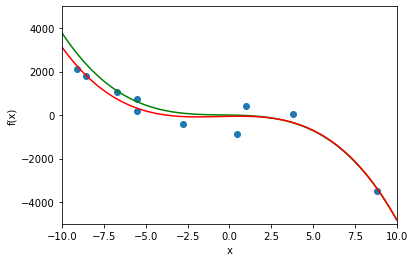

In [57]:
dots = np.linspace(-10, 10, 100)
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model =polynomial_regression_l2(3)
model.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

3*. (по желанию). Оцените оцените предсказательную способность реализованного метода с использование 5-ти ступенчатой кросс-валидации, показанной в примере выше.

In [58]:
#Посчитаем р-квадрат
def r_square(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total
print(r_square(model.predict(x_data), f_data))

0.9355435140607591


In [59]:
indexes=np.arange(len(f_data))%5
y_actual=[]
y_predicted=[]

for i in range(5):
    y_actual.append(f_data[indexes==i])
    mod=polynomial_regression_l2(3)
    mod.fit(x_data[indexes!=i], f_data[indexes!=i])
    y_predicted.append(mod.predict(x_data[indexes==i]))
    
y_actual=np.concatenate(y_actual)
y_predicted=np.concatenate(y_predicted)
print(r_square(y_predicted, y_actual))

-0.2943521469943293


In [60]:
np.sum((y_actual-np.mean(y_actual))**2)/len(y_actual)

2249573.810796306